# Pipeline Creation

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path = "/content/drive/MyDrive/AgriYield_cleaned.csv"

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.6 MB/s eta 0:00:00


In [ ]:
# ================== IMPORTS ==================
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from catboost import CatBoostRegressor, Pool

# ================== LOAD DATA ==================
dataset_path = "/content/drive/MyDrive/AgriYield_cleaned.csv"
df_clean = pd.read_csv(dataset_path)

print("✅ Dataset Loaded Successfully")
print("Shape:", df_clean.shape)
df_clean.head()


✅ Dataset Loaded Successfully
Shape: (25495, 12)


,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,Corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
1,2014-01-01,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
2,2014-01-01,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667
3,2014-01-01,Cotton,Sandy,6.75,14.826739,80.000000,10.366657,55.0,44.0,36.0,29.356115,39.375000
4,2014-01-01,Tomato,Clay,6.25,18.323272,80.000000,8.198084,60.0,45.0,40.0,22.221375,42.291667


In [ ]:
df_clean = df_clean.drop(columns=["Date"])
df_clean['Crop_Type'] = df_clean['Crop_Type'].str.lower().str.strip()
df_clean['Soil_Type'] = df_clean['Soil_Type'].str.lower().str.strip()

In [ ]:
X = df_clean.drop(columns=["Crop_Yield"])
y = df_clean["Crop_Yield"]

# Identify categorical columns
cat_features = X.select_dtypes(include=["object", "category"]).columns.tolist()
print("Categorical Columns:", cat_features)

# Train / test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)


Categorical Columns: ['Crop_Type', 'Soil_Type']


INITIALIZE CATBOOST MODEL

In [ ]:
model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=8,
    loss_function='RMSE',
    random_seed=42,
    verbose=100
)

In [ ]:
model.fit(X_train, y_train, cat_features=cat_features)


# ================== PREDICT ==================
y_pred = model.predict(X_test)


# ================== METRICS ==================
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Adjusted R²
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)


# ================== DISPLAY RESULTS ==================
print("\n🎯 Model Performance Metrics")
print("---------------------------------")
print(f"MAE       : {mae:.4f}")
print(f"MSE       : {mse:.4f}")
print(f"RMSE      : {rmse:.4f}")
print(f"R2 Score  : {r2:.4f}")
print(f"Adj R2    : {adj_r2:.4f}")
print("---------------------------------")

0:	learn: 21.6620754	total: 22.2ms	remaining: 11.1s
100:	learn: 5.1943034	total: 2.94s	remaining: 11.6s
200:	learn: 4.6570291	total: 5.99s	remaining: 8.92s
300:	learn: 4.4923032	total: 7.93s	remaining: 5.24s
400:	learn: 4.4130856	total: 9.75s	remaining: 2.41s
499:	learn: 4.3469804	total: 11.6s	remaining: 0us

🎯 Model Performance Metrics
---------------------------------
MAE       : 3.2079
MSE       : 20.9344
RMSE      : 4.5754
R2 Score  : 0.9586
Adj R2    : 0.9585
---------------------------------


In [ ]:
# ================== SAVE MODEL ==================
model.save_model("/content/drive/MyDrive/crop_yield_catboost_model.cbm")
print("✅ Model saved successfully!")


✅ Model saved successfully!


In [ ]:
!pip install catboost


In [ ]:
import pandas as pd
from catboost import CatBoostRegressor

# Load model
model = CatBoostRegressor()
model.load_model("/content/drive/MyDrive/crop_yield_catboost_model.cbm")

def predict_yield(Crop_Type, Soil_Type, Soil_pH, Temperature, Humidity, Wind_Speed, N, P, K, Soil_Quality):

    # Create input dataframe with correct column names
    input_data = pd.DataFrame([{
        "Crop_Type": Crop_Type,
        "Soil_Type": Soil_Type,
        "Soil_pH": Soil_pH,
        "Temperature": Temperature,
        "Humidity": Humidity,
        "Wind_Speed": Wind_Speed,
        "N": N,
        "P": P,
        "K": K,
        "Soil_Quality": Soil_Quality
    }])

    # Model prediction
    prediction = model.predict(input_data)[0]
    return prediction

# ✅ Example Test
print(predict_yield("corn", "loamy", 6.5, 20.0525764240326, 79.9474235759674, 8.59157684219514, 84, 66, 50, 66.6666666666667)) #first row
print(predict_yield("sunflower", "clay", 6.25, 11.4556922091307, 80, 5.39475781321834, 60, 0, 44, 46.375)) #last row
print(predict_yield("cotton", "sandy", 6.75, 17.9397554108704, 80, 7.30373536453604, 55, 0, 36, 39.375)) #10k
print(predict_yield("sugarcane", "saline", 8, 17.8958289913123, 80, 13.3681354757762, 84.5, 5064, 54, 17.0416666666667)) #5k


96.00672995574381
9.88689708256888
46.846420885889266
19.090334044934593


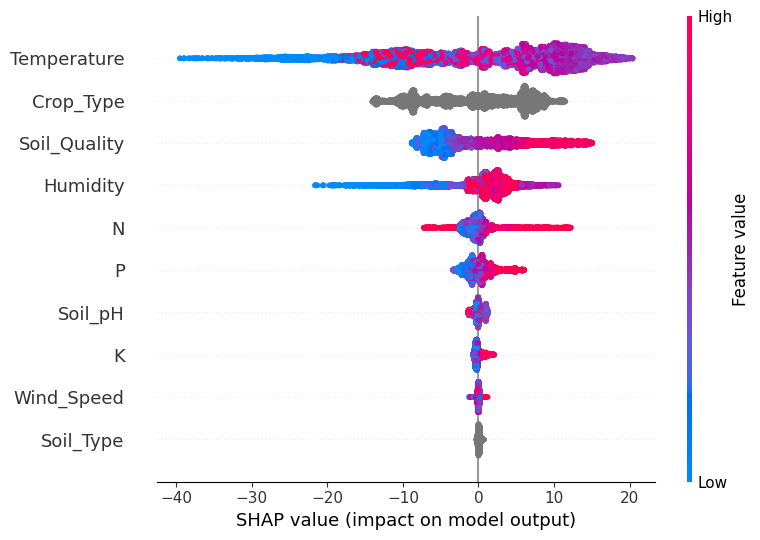

In [ ]:
# ================== SHAP EXPLAINABILITY ==================
!pip install shap --quiet

import shap

# Initialize SHAP Explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# Summary Plot (Global Feature Effect)
shap.summary_plot(shap_values, X_train)


# Time series Dataset Creation and model development

In [ ]:
import pandas as pd

dataset_path = "/content/drive/MyDrive/AgriYield_cleaned.csv"

# 1. Load dataset
df = pd.read_csv(dataset_path)
print("Dataset loaded:", df.shape)

# 2. Filter only Rice crop (case-insensitive)
rice_df = df[df["Crop_Type"].str.lower() == "rice"].copy()
print("Rice dataset shape:", rice_df.shape)

# 3. Convert Date column to datetime format
rice_df["Date"] = pd.to_datetime(rice_df["Date"], errors="coerce")

# 4. Drop invalid date rows if any
rice_df = rice_df.dropna(subset=["Date"])

# 5. Sort by date
rice_df = rice_df.sort_values("Date").reset_index(drop=True)

# 6. Set Date as index (required for time series)
rice_df.set_index("Date", inplace=True)

# 7. Resample to Daily Data (taking mean for daily yield)
rice_daily = rice_df["Crop_Yield"].resample("D").mean()

# 8. Fill missing days (forward fill)
rice_daily = rice_daily.ffill().bfill()

# Preview final dataset
print("Final daily rice time series shape:", rice_daily.shape)
display(rice_daily.head(10))


Dataset loaded: (25495, 12)
Rice dataset shape: (2569, 12)
Final daily rice time series shape: (3646,)


,Crop_Yield
Date,
2014-01-05,0.566930
2014-01-06,0.689849
2014-01-07,0.689849
2014-01-08,0.689849
2014-01-09,25.499600
2014-01-10,24.413266
2014-01-11,24.413266
2014-01-12,56.037691
2014-01-13,56.037691


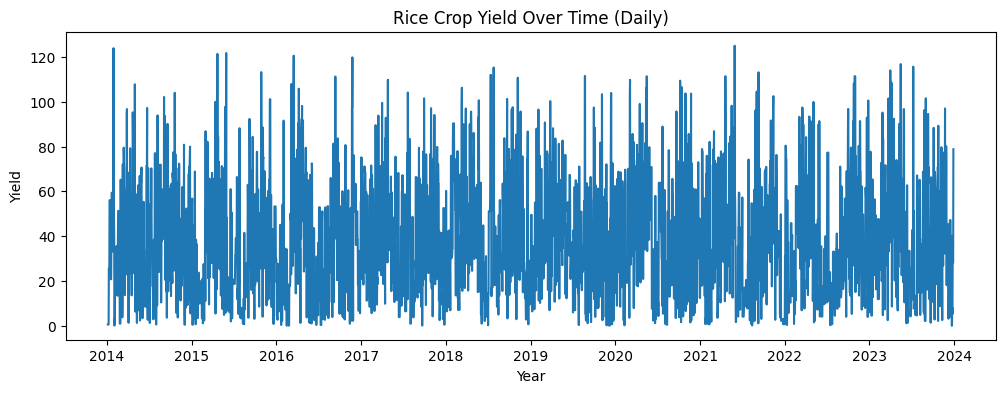

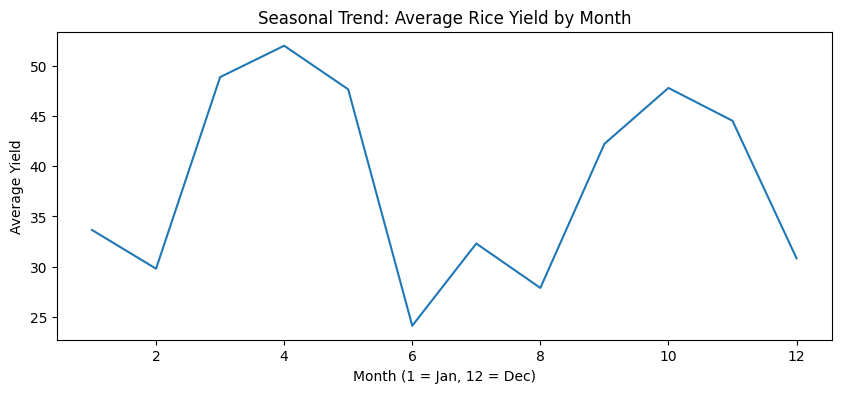

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure rice_daily is a DataFrame for grouping
rice_daily_df = rice_daily.to_frame(name="Yield")

# 1️⃣ Plot Yield Over Time
plt.figure(figsize=(12,4))
plt.plot(rice_daily_df.index, rice_daily_df["Yield"])
plt.title("Rice Crop Yield Over Time (Daily)")
plt.xlabel("Year")
plt.ylabel("Yield")
plt.show()

# 2️⃣ Extract Month for Seasonality Analysis
rice_daily_df["Month"] = rice_daily_df.index.month

# Compute average yield for each month
monthly_trend = rice_daily_df.groupby("Month")["Yield"].mean()

# 3️⃣ Plot Monthly Seasonality
plt.figure(figsize=(10,4))
sns.lineplot(x=monthly_trend.index, y=monthly_trend.values)
plt.title("Seasonal Trend: Average Rice Yield by Month")
plt.xlabel("Month (1 = Jan, 12 = Dec)")
plt.ylabel("Average Yield")
plt.show()


Stationarity Check using ADF and KPSS tests.

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

# Use the daily yield series
series = rice_daily  # (this is already the daily rice yield series)

def adf_test(series):
    result = adfuller(series.dropna())
    print("📌 ADF Test")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    if result[1] < 0.05:
        print("✅ p-value < 0.05 → The series is **Stationary**")
    else:
        print("❌ p-value ≥ 0.05 → The series is **Not Stationary**")

def kpss_test(series):
    result = kpss(series.dropna(), regression='c')
    print("\n📌 KPSS Test")
    print(f"KPSS Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    if result[1] > 0.05:
        print("✅ p-value > 0.05 → The series is **Stationary**")
    else:
        print("❌ p-value ≤ 0.05 → The series is **Not Stationary**")

# Run the tests
adf_test(series)
kpss_test(series)


📌 ADF Test
ADF Statistic: -10.9748
p-value: 0.0000
✅ p-value < 0.05 → The series is **Stationary**

📌 KPSS Test
KPSS Statistic: 0.0591
p-value: 0.1000
✅ p-value > 0.05 → The series is **Stationary**


/tmp/ipython-input-3795629021.py:17: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series.dropna(), regression='c')


Plot ACF & PACF

<Figure size 1200x400 with 0 Axes>

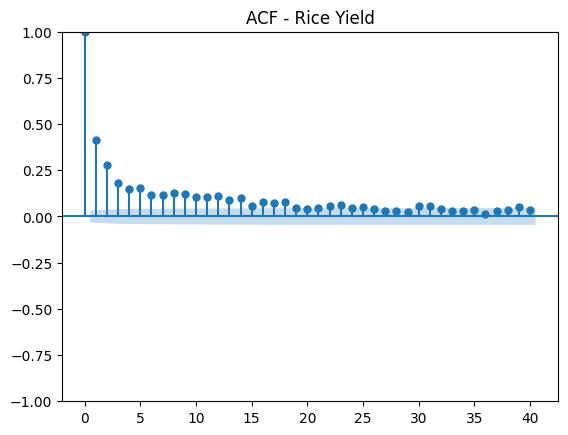

<Figure size 1200x400 with 0 Axes>

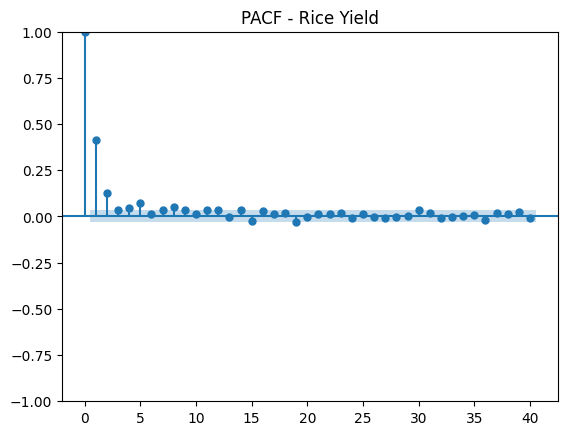

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plot_acf(rice_daily, lags=40)
plt.title("ACF - Rice Yield")
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(rice_daily, lags=40, method='ywm')
plt.title("PACF - Rice Yield")
plt.show()


RangeIndex(start=0, stop=25495, step=1)
Index(['Date', 'Crop_Type', 'Soil_Type', 'Soil_pH', 'Temperature', 'Humidity',
       'Wind_Speed', 'N', 'P', 'K', 'Crop_Yield', 'Soil_Quality'],
      dtype='object')
✅ Using target column for time-series: Crop_Yield
Date
2014-01-05     0.566930
2014-01-06     0.689849
2014-01-07     0.689849
2014-01-08     0.689849
2014-01-09    25.499600
Name: Crop_Yield, dtype: float64

📌 ADF Test Results
------------------------
ADF Statistic  : -10.9748
p-value        : 0.0000
=> Interpretation: p-value < 0.05 means STATIONARY

📌 KPSS Test Results
------------------------
KPSS Statistic : 0.0591
p-value        : 0.1000
=> Interpretation: p-value > 0.05 means STATIONARY


/tmp/ipython-input-2291967431.py:29: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series.dropna(), regression="c")


<Figure size 1200x400 with 0 Axes>

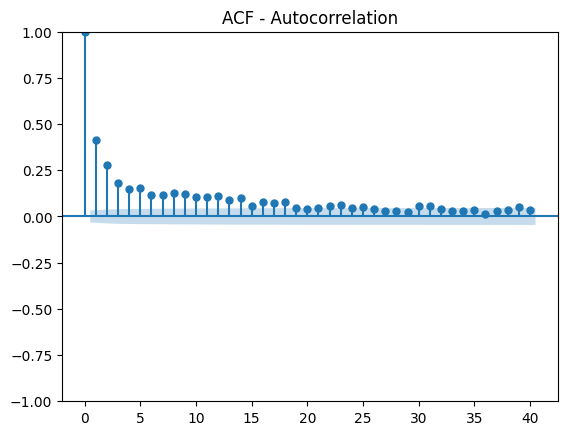

<Figure size 1200x400 with 0 Axes>

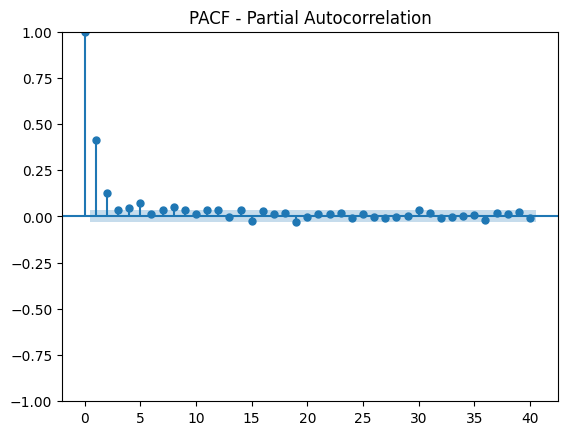

In [ ]:
print(df.index)
print(df.columns)# STEP 2: Stationarity Tests + ACF / PACF

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the daily resampled Rice dataset
df_rice_daily = pd.read_csv("/content/drive/MyDrive/AgriYield_rice_daily.csv", index_col="Date", parse_dates=True)

# Let's choose the target column for forecasting
target_column = "Crop_Yield"

series = df_rice_daily[target_column]

print("✅ Using target column for time-series:", target_column)
print(series.head())

# --------------------- ADF Test ---------------------
adf_result = adfuller(series.dropna())
print("\n📌 ADF Test Results")
print("------------------------")
print(f"ADF Statistic  : {adf_result[0]:.4f}")
print(f"p-value        : {adf_result[1]:.4f}")
print("=> Interpretation: p-value < 0.05 means STATIONARY")

# --------------------- KPSS Test ---------------------
kpss_result = kpss(series.dropna(), regression="c")
print("\n📌 KPSS Test Results")
print("------------------------")
print(f"KPSS Statistic : {kpss_result[0]:.4f}")
print(f"p-value        : {kpss_result[1]:.4f}")
print("=> Interpretation: p-value > 0.05 means STATIONARY")

# --------------------- ACF and PACF Plots ---------------------
plt.figure(figsize=(12,4))
plot_acf(series.dropna(), lags=40)
plt.title("ACF - Autocorrelation")
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(series.dropna(), lags=40, method="ywm")
plt.title("PACF - Partial Autocorrelation")
plt.show()



Model Training Code

In [ ]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as index
df = df.set_index('Date')

# Extract the yield series
rice_yield = df['Crop_Yield']


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(rice_yield, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Crop_Yield   No. Observations:                25495
Model:                 ARIMA(1, 1, 0)   Log Likelihood             -119930.831
Date:                Tue, 04 Nov 2025   AIC                         239865.661
Time:                        06:43:35   BIC                         239881.954
Sample:                             0   HQIC                        239870.930
                              - 25495                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4894      0.005    -89.825      0.000      -0.500      -0.479
sigma2       713.8103      6.247    114.267      0.000     701.567     726.054
Ljung-Box (L1) (Q):                 703.38   Jarque-

In [ ]:
# Number of months to predict → 10 years = 10 * 12 = 120
steps = 120

# Forecast
forecast = model_fit.forecast(steps=steps)

# Create future date index starting right after the last date
future_dates = pd.date_range(start="2025-01-01", periods=steps, freq='M')
forecast.index = future_dates


# Assign dates to forecast
forecast.index = future_dates

print("📌 10-Year Forecast (2025–2035):")
print(forecast)


📌 10-Year Forecast (2025–2035):
2025-01-31     9.008074
2025-02-28    10.387109
2025-03-31     9.712234
2025-04-30    10.042506
2025-05-31     9.880877
                ...    
2034-08-31     9.933985
2034-09-30     9.933985
2034-10-31     9.933985
2034-11-30     9.933985
2034-12-31     9.933985
Freq: ME, Name: predicted_mean, Length: 120, dtype: float64


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/tmp/ipython-input-2284256726.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start="2025-01-01", periods=steps, freq='M')


In [ ]:
forecast_yearly = forecast.resample('Y').mean()
print("📌 Yearly Average Yield Forecast (2025–2035):")
print(forecast_yearly)


📌 Yearly Average Yield Forecast (2025–2035):
2025-12-31    9.882188
2026-12-31    9.933975
2027-12-31    9.933985
2028-12-31    9.933985
2029-12-31    9.933985
2030-12-31    9.933985
2031-12-31    9.933985
2032-12-31    9.933985
2033-12-31    9.933985
2034-12-31    9.933985
Freq: YE-DEC, Name: predicted_mean, dtype: float64


/tmp/ipython-input-3361663763.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_yearly = forecast.resample('Y').mean()


<Figure size 1200x800 with 0 Axes>

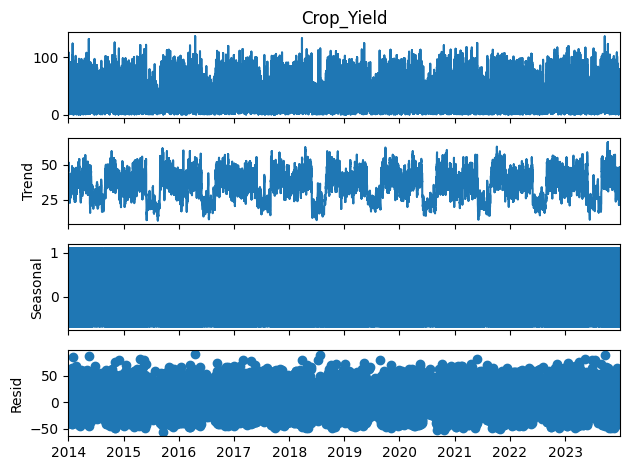

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose (assuming monthly frequency)
decomposition = seasonal_decompose(rice_yield, model='additive', period=12)

plt.figure(figsize=(12,8))
decomposition.plot()
plt.show()


In [ ]:
import numpy as np

seasonal_strength = 1 - (np.var(decomposition.resid.dropna()) / np.var((decomposition.seasonal + decomposition.resid).dropna()))
print("Seasonality Strength:", seasonal_strength)


Seasonality Strength: 0.00048187126979959416


In [ ]:
import joblib

# Save the ARIMA model
joblib.dump(model_fit, "/content/drive/MyDrive/rice_arima_model.pkl")

print("✅ Rice ARIMA model saved successfully!")


✅ Rice ARIMA model saved successfully!


forecasting for sugarcane

In [ ]:
dataset_path = "/content/drive/MyDrive/AgriYield_cleaned.csv"

df = pd.read_csv(dataset_path)
print("Loaded:", df.shape)
print(df.columns)


Loaded: (25495, 12)
Index(['Date', 'Crop_Type', 'Soil_Type', 'Soil_pH', 'Temperature', 'Humidity',
       'Wind_Speed', 'N', 'P', 'K', 'Crop_Yield', 'Soil_Quality'],
      dtype='object')


In [ ]:
df_sugar = df[df["Crop_Type"].str.lower() == "sugarcane"].copy()
print("Sugarcane rows:", df_sugar.shape)

df_sugar["Date"] = pd.to_datetime(df_sugar["Date"], errors="coerce")
df_sugar = df_sugar.dropna(subset=["Date"])
df_sugar = df_sugar.sort_values("Date").reset_index(drop=True)

df_sugar.set_index("Date", inplace=True)

print(df_sugar.head())


Sugarcane rows: (2556, 12)
            Crop_Type Soil_Type  Soil_pH  Temperature   Humidity  Wind_Speed  \
Date                                                                           
2014-01-04  Sugarcane    Saline      8.0    22.026027  77.973973   14.176977   
2014-01-05  Sugarcane     Loamy      6.5    17.834470  80.000000    9.506499   
2014-01-09  Sugarcane    Saline      8.0    17.647178  80.000000    9.448325   
2014-01-10  Sugarcane    Saline      8.0    16.622592  80.000000   15.025880   
2014-01-11  Sugarcane    Saline      8.0    19.217870  80.000000    6.801036   

               N     P     K  Crop_Yield  Soil_Quality  
Date                                                    
2014-01-04  84.5  66.0  54.0   45.860149     17.041667  
2014-01-05  91.0  72.0  60.0   31.152431     74.333333  
2014-01-09  84.5  66.0  54.0   18.776500     17.041667  
2014-01-10  84.5  66.0  54.0   12.646139     17.041667  
2014-01-11  84.5  66.0  54.0   28.070672     17.041667  


In [ ]:
# Select only numeric columns (so we don't accidentally average strings)
numeric_cols = df_sugar.select_dtypes(include=["number"]).columns.tolist()

# Resample daily by mean aggregation
df_sugar_daily = df_sugar[numeric_cols].resample("D").mean()

# Fill missing dates (important for stable forecasting)
df_sugar_daily = df_sugar_daily.ffill().bfill()

print("Daily Sugarcane Time Series Shape:", df_sugar_daily.shape)
df_sugar_daily.head()


Daily Sugarcane Time Series Shape: (3649, 9)


,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
Date,,,,,,,,,
2014-01-04,8.0,22.026027,77.973973,14.176977,84.5,66.0,54.0,45.860149,17.041667
2014-01-05,6.5,17.834470,80.000000,9.506499,91.0,72.0,60.0,31.152431,74.333333
2014-01-06,6.5,17.834470,80.000000,9.506499,91.0,72.0,60.0,31.152431,74.333333
2014-01-07,6.5,17.834470,80.000000,9.506499,91.0,72.0,60.0,31.152431,74.333333
2014-01-08,6.5,17.834470,80.000000,9.506499,91.0,72.0,60.0,31.152431,74.333333


In [ ]:
sugar_yield = df_sugar_daily["Crop_Yield"]


In [ ]:
print(df_sugar_daily.head())


            Soil_pH  Temperature   Humidity  Wind_Speed     N     P     K  \
Date                                                                        
2014-01-04      8.0    22.026027  77.973973   14.176977  84.5  66.0  54.0   
2014-01-05      6.5    17.834470  80.000000    9.506499  91.0  72.0  60.0   
2014-01-06      6.5    17.834470  80.000000    9.506499  91.0  72.0  60.0   
2014-01-07      6.5    17.834470  80.000000    9.506499  91.0  72.0  60.0   
2014-01-08      6.5    17.834470  80.000000    9.506499  91.0  72.0  60.0   

            Crop_Yield  Soil_Quality  
Date                                  
2014-01-04   45.860149     17.041667  
2014-01-05   31.152431     74.333333  
2014-01-06   31.152431     74.333333  
2014-01-07   31.152431     74.333333  
2014-01-08   31.152431     74.333333  


In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

def adf_test(series):
    result = adfuller(series.dropna())
    print("\n📌 ADF Test")
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("=> Interpretation:", "Stationary ✅" if result[1] < 0.05 else "Not Stationary ❌")

def kpss_test(series):
    result = kpss(series.dropna(), regression='c')
    print("\n📌 KPSS Test")
    print("KPSS Statistic:", result[0])
    print("p-value:", result[1])
    print("=> Interpretation:", "Stationary ✅" if result[1] > 0.05 else "Not Stationary ❌")

# Run tests
adf_test(sugar_yield)
kpss_test(sugar_yield)



📌 ADF Test
ADF Statistic: -10.332300446122098
p-value: 2.821755793811154e-18
=> Interpretation: Stationary ✅

📌 KPSS Test
KPSS Statistic: 0.022596282898410723
p-value: 0.1
=> Interpretation: Stationary ✅


/tmp/ipython-input-708188732.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series.dropna(), regression='c')
